In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

# Esercitazione 3 _ Bonato Angela

L'esercitazione richiedeva di simulare via Monte Carlo il costo delle opzioni put e call europee a tempo $t=0$. Per questo tipo di titoli, il prezzo di mercato $S(t)$ evolve nel tempo come un moto Browniano geometrico (GBM) con tasso d'interesse privo di rischi $r$ e volatilità $v$ costanti (ovvero, $S\sim GBM(r,v^2)$). Dunque, mediante la teoria di Black-Scholes, è possibile calcolare le soluzioni analitiche per il prezzo che la call e la put option ($C\left[ S(t),t \right]$ e $P\left[ S(t),t \right]$ rispettivamente) assumono ad un tempo $t<T$, dove $T$ è il momento in cui le opzioni scadranno. Utilizzando i risultati di questo calcolo, ho potuto ottenere dei valori attesi da  confrontare con i risultati delle simulazioni.

In [2]:
#calcolo valori analitici fornito dal prof
S0=100.
K=100.
T=1.
r=0.1
volat=0.25
t=0

def N(x):
    return 0.5*(1.+erf(x/np.sqrt(2.)))

def black_scholes(S0, K, T, r, volat):
    d1=1./(volat*np.sqrt(T))*(np.log(S0/K)+(r+(volat**2)/2.)*T)
    d2=d1-volat*np.sqrt(T)
    C=S0*N(d1)-K*np.exp(-r*T)*N(d2)
    P=S0*(N(d1)-1.)-K*np.exp(-r*T)*(N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, volat)
    print("Risultati analitici Black-Scholes")
    print("call: ", call)
    print("put: ", put)

Risultati analitici Black-Scholes
call:  14.975790778311286
put:  5.4595325819072364


## Analisi diretta

Per prima cosa ho eseguito l'analisi tramite sampling diretto. Noto $S(t=0)$ e fissati $T=1$, $r=0.1$, $v=0.25$ e $K=100$ (prezzo di esercizio); ho valutato direttamente il prezzo $S(T)$ sfruttando le leggi che regolano il moto Browniano. Dalla stima ottenuta ho calcolato $\langle C[S(0),0] \rangle$ e $\langle P[S(0),0] \rangle$ e relativi errori mediante un'analisi a blocchi. Nello specifico, ho ripeturo i calcoli $M=10^5$ volte dividendo i valori in $N=100$ blocchi.

Per entrambi i prezzi il valor medio all'ultimo blocco risulta compatibile con il valore atteso analitico entro $1\sigma$.

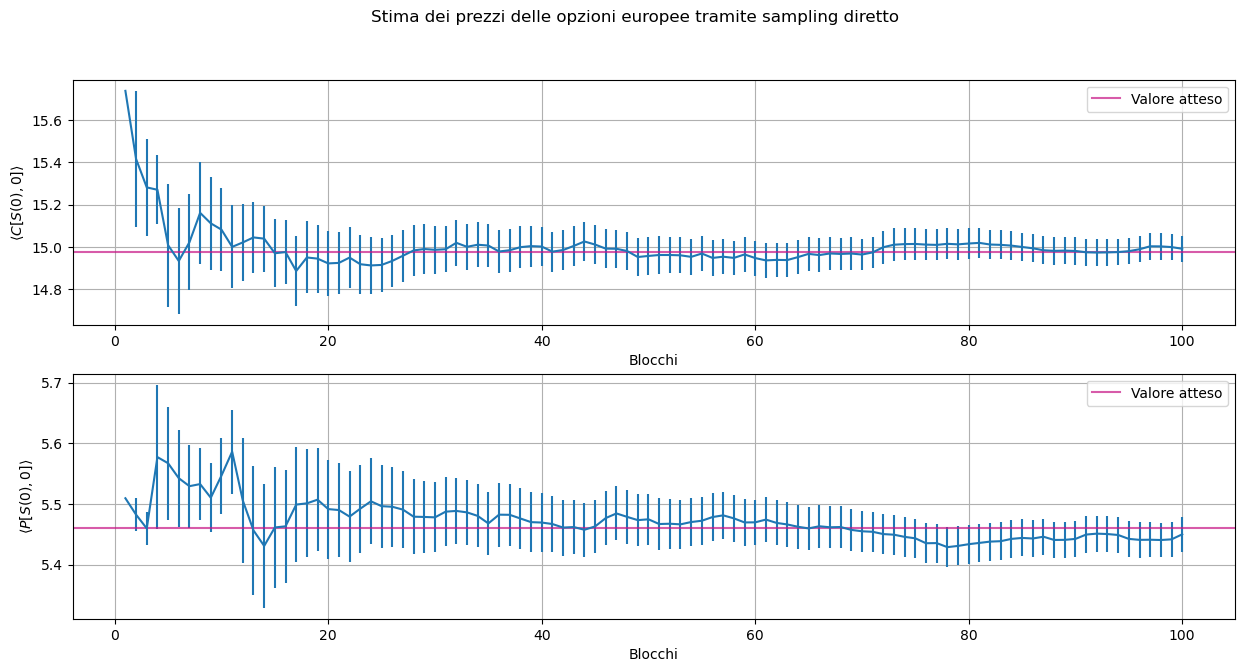

In [3]:
M=100000  #numero totale di stime di S(T)
N=100  #numero di blocchi
L=int(M/N)  #numero di estrazioni per blocco
x=np.arange(N)+1  #vettore delle ascisse dei punti plottati

#valori medi (ordinate) con errore per plot call e put 
dircy, dircerrorbars=np.loadtxt("directcall.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  
dirpy, dirperrorbars=np.loadtxt("directput.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  

dirfig ,(dirplt1, dirplt2) = plt.subplots(2, 1, figsize=(15, 7))

dirplt1.errorbar(x, dircy, yerr=dircerrorbars)
dirplt1.axhline(y=call, color="mediumvioletred", label="Valore atteso", alpha=0.7)
dirplt1.set_xlabel("Blocchi")
dirplt1.set_ylabel(r"$\left<C[S(0), 0]\right>$")
dirplt1.grid(True)
dirplt1.legend()

dirplt2.errorbar(x, dirpy, yerr=dirperrorbars)
dirplt2.axhline(y=put, color="mediumvioletred", label="Valore atteso", alpha=0.7)
dirplt2.set_xlabel("Blocchi")
dirplt2.set_ylabel(r"$\left<P[S(0), 0]\right>$")
dirplt2.grid(True)
dirplt2.legend()

dirfig.suptitle("Stima dei prezzi delle opzioni europee tramite sampling diretto")
plt.show()

## Analisi discretizzata

Fissati gli stessi parametri della simulazione precedente, in questo caso ho valutato $\langle C[S(0),0] \rangle$ e $\langle P[S(0),0] \rangle$ discretizzando la stima del prezzo di mercato. Nello specifico, utilizzando le equazioni ricorsive che caratterizzano il moto Browniano geometrico, ho ottenuto $S(T)$ effettuando stime di $S(t)$ per $100$ valori di $t \in [0, T]$. Anche qui ho fornito i valori medi con relativi errori sui prezzi di call e put options mediante un'analisi a blocchi con $M=10^5$ stime di $S(T)$ suddivise in $N=100$ blocchi.

Nuovamente, i risultati all'ultimo blocco sono compatibili con i valori attesi entro $1\sigma$.

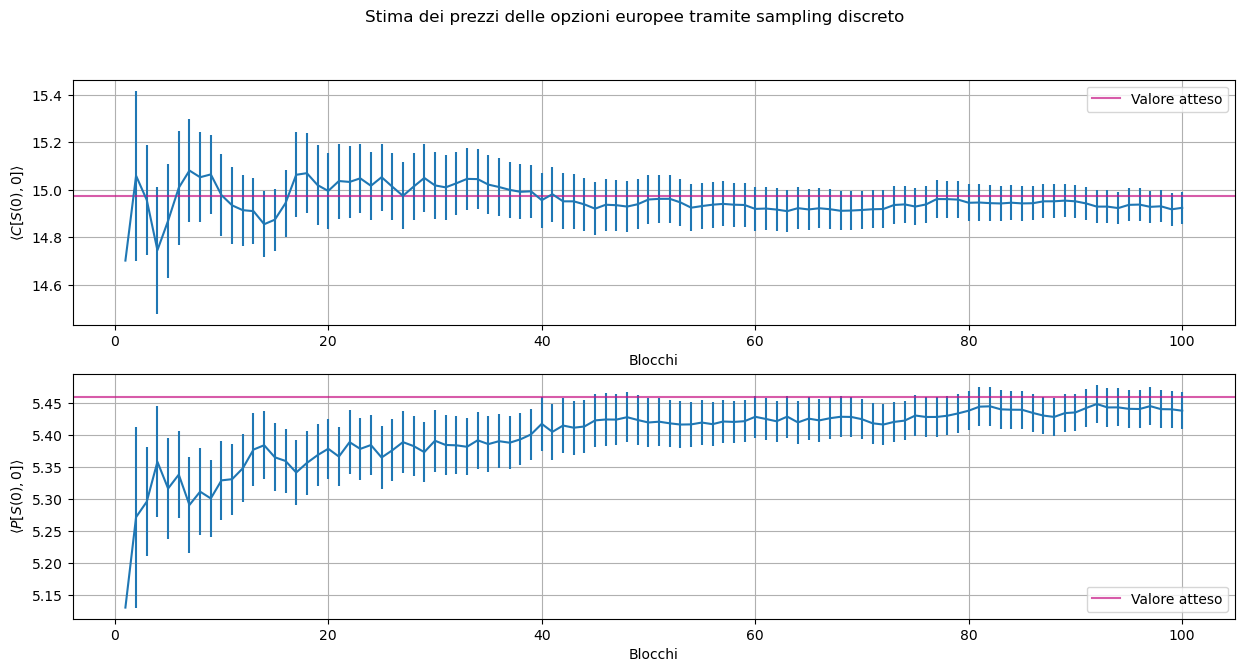

In [4]:
#valori medi (ordinate) con errore per plot call e put 
discy, discerrorbars=np.loadtxt("discretecall.dat", delimiter=" ", usecols=(0, 1),  unpack="true") 
dispy, disperrorbars=np.loadtxt("discreteput.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  


disfig ,(displt1, displt2) = plt.subplots(2, 1, figsize=(15, 7))

displt1.errorbar(x, discy, yerr=discerrorbars)
displt1.axhline(y=call, color="mediumvioletred", label="Valore atteso", alpha=0.7)
displt1.set_xlabel("Blocchi")
displt1.set_ylabel(r"$\left<C[S(0), 0]\right>$")
displt1.grid(True)
displt1.legend()

displt2.errorbar(x, dispy, yerr=disperrorbars)
displt2.axhline(y=put, color="mediumvioletred", label="Valore atteso", alpha=0.7)
displt2.set_xlabel("Blocchi")
displt2.set_ylabel(r"$\left<P[S(0), 0]\right>$")
displt2.grid(True)
displt2.legend()

disfig.suptitle("Stima dei prezzi delle opzioni europee tramite sampling discreto")
plt.show()

## Confronto

In entrambe le analisi condotte per tutti i risultati si riscontra un buon accordo con quanto atteso e anche confrontando l'andamento degli errori rispetto ai blocchi non ci sono evidenti incongruenze. 

Osservando gli errori sui valori del prezzo delle call options ad ogni blocco, pare che l'analisi diretta fornisca stime più accurate. Guardando il prezzo delle put options però, è possibile notare come nell'analisi discretizzata gli errori tendano ad abbassarsi più velocemente rispetto a quelli calcolati con sampling diretto. Di conseguenza, come atteso, non risulta esserci un metodo marcatamente privilegiato per condurre l'analisi presentata e le piccole differenze sono da ritenersi di natura statistica.

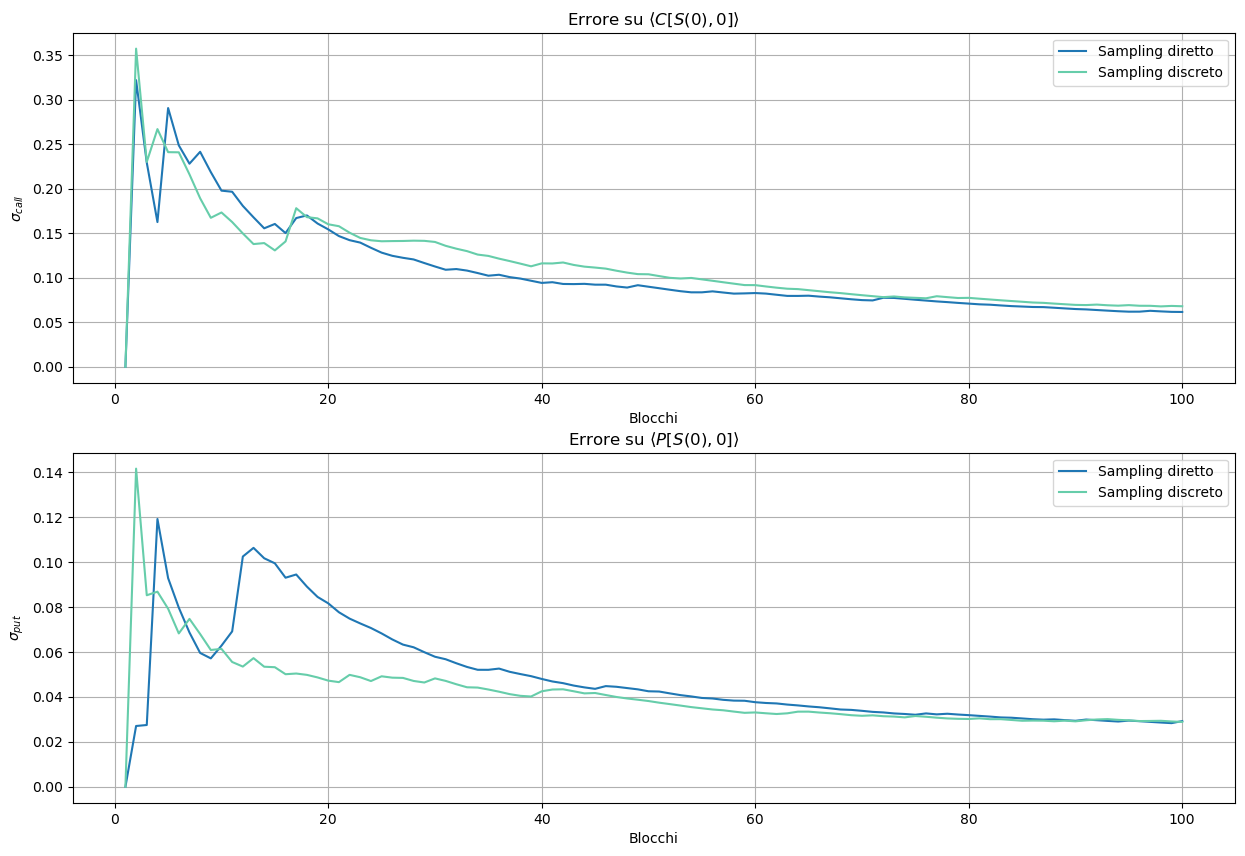

In [5]:
cfig ,(cplt1, cplt2) = plt.subplots(2, 1, figsize=(15, 10))

cplt1.plot(x, dircerrorbars, label="Sampling diretto")
cplt1.plot(x, discerrorbars, label="Sampling discreto", color='mediumaquamarine')
cplt1.set_xlabel("Blocchi")
cplt1.set_ylabel(r"$\sigma_{call}$")
cplt1.set_title(r"Errore su $\left<C[S(0), 0]\right>$")
cplt1.grid(True)
cplt1.legend()

cplt2.plot(x, dirperrorbars, label="Sampling diretto")
cplt2.plot(x, disperrorbars, label="Sampling discreto", color='mediumaquamarine')
cplt2.set_xlabel("Blocchi")
cplt2.set_ylabel(r"$\sigma_{put}$")
cplt2.set_title(r"Errore su $\left<P[S(0), 0]\right>$")
cplt2.grid(True)
cplt2.legend()

plt.show()